In [16]:
list1 = ['A', 'A', 'B', 'C', 'A', 'F', 'F']

def counts(listArgument):
    # count the number of times each unique element appears in the list
    # save element as a dict key, save number of times each one repeats as a value
    
    elementCount = {} # declaring the empty dictionary
    
    for key in listArgument:
        elementCount[key] = elementCount.get(key, 0) + 1
        # the for loop iterates through the elements in listArgument
        # for each element in the list, it runs the get() method to check if it exists in the dictionary
        # the get() method takes a key and a default return value as arguments
        # if the key is not found in the dict, it is added with the value set to 0
        # the value of that key is then incremented by 1
    
    return elementCount # returns the elementCount dicitonary to the terminal

counts(list1)

{'A': 3, 'B': 1, 'C': 1, 'F': 2}

In [1]:
import numpy as np

rng = np.random.default_rng() # random number generator

def dicerolls(k, n):
    
    # k = number of dice, n = number of rolls
    # randomly choose a value of 1-6 k times, repeat this n times
    # find the total value of each round and save to a dictionary as keys, frequency as values
    # use the code from Task 1 to generate the dictionary
    
    resultsArray = {} # declaring the empty dictionary of results
    
    dicerollValues = [] # declaring the empty list of all diceroll results
    
    roundTotals = []
    
    possibleTotals = []
    
    for i in range(n): # for loop to calculate the values produced in all rounds
        
        roundNum = i + 1 # for counting each round in the terminal
        dicerollRoundValues = []
        
        for j in range(k): # for loop to calculate the values produced in each round
            faceValue = rng.integers(1,7)
            # runs the integers() numpy function to generate a random integer between the limits
            # (non-inclusive for upper limit)
            dicerollRoundValues.append(faceValue) # appends the result of each die to the list
            dicerollValues.append(faceValue) # appends the result of each die to the list of all rolls
            
        roundTotal = np.sum(dicerollRoundValues)
        roundTotals.append(roundTotal)
        
        # print("Results in round " + str(roundNum) + ":" + "\n" + str(dicerollRoundValues)) # prints results of each round
        # print("Total  in round " + str(roundNum) + ":" + "\n" + str(roundTotal))
        # prints total value of each round using the sum() function, which takes an array as argument
        
    print("Round totals: \n" + str(roundTotals) + "\n")
    
    lowestTotal = 1*k
    highestTotal = 6*k
    possibleTotals = list(range(lowestTotal, (highestTotal + 1)))
    # print("Possible totals: \n" + str(possibleTotals) + "\n")
    
    totalsFrequency = {}
    
    for key in possibleTotals:
        totalsFrequency[key] = totalsFrequency.get(key, 0)
    
    for key in roundTotals:
        totalsFrequency[key] = totalsFrequency.get(key, 0) + 1
    print("Frequency of totals values: \n" + str(totalsFrequency))
    
    # return dicerollValues # returns the list of the first round of dicerolls
    # return totalsFrequency

dicerolls(2, 100)

Round totals: 
[8, 10, 4, 7, 4, 4, 9, 10, 5, 10, 9, 5, 7, 10, 11, 6, 10, 9, 8, 3, 7, 9, 5, 8, 8, 2, 12, 11, 4, 6, 9, 7, 5, 7, 3, 7, 8, 8, 6, 7, 12, 2, 7, 5, 4, 4, 9, 6, 11, 11, 7, 9, 10, 8, 6, 9, 8, 3, 5, 5, 7, 2, 6, 8, 7, 4, 8, 8, 3, 6, 2, 8, 6, 5, 4, 7, 7, 4, 6, 4, 6, 4, 4, 4, 6, 6, 7, 9, 4, 7, 3, 8, 11, 6, 7, 3, 10, 6, 7, 11]

Frequency of totals values: 
{2: 4, 3: 6, 4: 14, 5: 8, 6: 14, 7: 17, 8: 13, 9: 9, 10: 7, 11: 6, 12: 2}


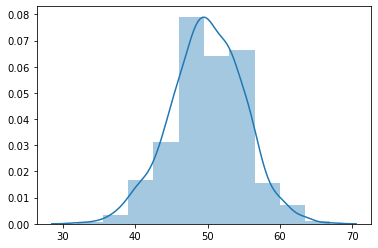

In [1]:
# simulate 100 coinflips
# do for 1000 rounds
# track number of heads results in each round
# plot results to show the bell-shaped curve

import numpy as np
import seaborn as sns

rng = np.random.default_rng()

# simulate 100 coinflips 1000 times

headsList = []
roundList = []
roundsCount = 0

while roundsCount < 1000:
    headsList = rng.binomial(100, 0.5)
    roundsCount = roundsCount + 1
    roundList.append(headsList)

# print(roundList)

sns.distplot(roundList, bins=10)

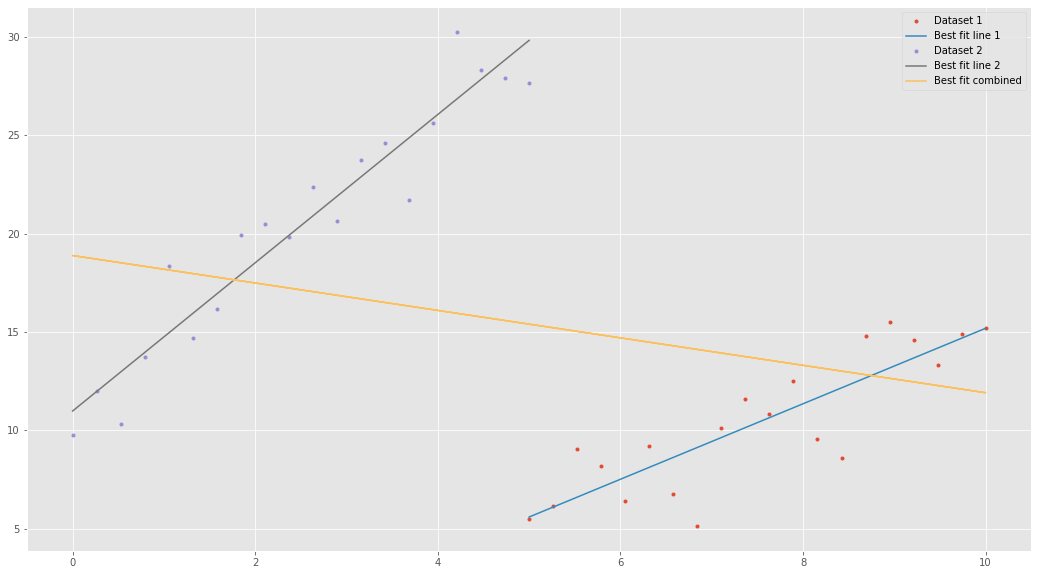

In [28]:
# set up 4 datasets with linspace using the formula "y = a * x + b"
# populate te 4 datasets such that when plotted, they demonstrate Simpson's paradox
# i.e., that each individual dataset shows a relation in one direction,
# but when combined the sets show a relation in the opposite direction

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nicer plot style.
plt.style.use("ggplot")

# Bigger plots.
plt.rcParams["figure.figsize"] = (18,10)

# dataset 1
setOneX = np.linspace(5.0, 10.0, 20)
setOneY = 1.0 * setOneX + 3.0 + np.random.normal(0.0, 2.0, len(setOneX))
coeffsSetOne = np.polyfit(setOneX, setOneY, 1)
plt.plot(setOneX, setOneY, '.', label="Dataset 1")
plt.plot(setOneX, coeffsSetOne[0] * setOneX + coeffsSetOne[1], '-', label="Best fit line 1")

# dataset 2
setTwoX = np.linspace(0.0, 5.0, 20)
setTwoY = 4.0 * setTwoX + 10.0 + np.random.normal(0.0, 2.0, len(setTwoX))
coeffsSetTwo = np.polyfit(setTwoX, setTwoY, 1)
plt.plot(setTwoX, setTwoY, '.', label="Dataset 2")
plt.plot(setTwoX, coeffsSetTwo[0] * setTwoX + coeffsSetTwo[1], '-', label="Best fit line 2")

combinedX = np.concatenate([setOneX, setTwoX])
combinedY = np.concatenate([setOneY, setTwoY])

combinedCoeffs = np.polyfit(combinedX, combinedY, 1)

plt.plot(combinedX, combinedCoeffs[0] * combinedX + combinedCoeffs[1], '-', label="Best fit combined")
plt.legend();